In [1]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


1.We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.  [Hint: Refer to LabelEncoder documentation in scikit-learn]

In [2]:
df_voices = pd.read_csv("voice.csv")
df_voices.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Map the label as male:0 and female:1

In [3]:
df_voices["label"] = df_voices["label"].map({"male":"0", "female":"1"})

take all rows and column from 0 to 19 as features into X

In [4]:
X = df_voices.iloc[:,0:19]

Take the last column or label column as Y or target(label)

In [5]:
Y = df_voices["label"]

2.Fit a logistic regression model and measure the accuracy on the test set. [Hint: Refer to Linear Models section in scikit-learn]

Split the data set into training and testing data set (80/20) with ramdom_state or suffling factor(beforing apllying split) of 20

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size = 0.20, random_state=0) 


create the logisticRegression and train the model using .fit method and with max_iterantion of 1000

In [7]:
ln_model = LogisticRegression(solver='lbfgs', max_iter=1000)
ln_model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

Now use prediction on the test data set

In [8]:
predicted_data = ln_model.predict(test_x)

 check the accuracy of the predicted test data

In [9]:
metrics.accuracy_score(predicted_data, test_y)

0.9116719242902208

The accuracy appears to be 91 percent which is pretty good

3.Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated.  Plot the correlation matrix using seaborn heatmap. [Hint: Explore dataframe methods to identify appropriate method]

In [10]:
corr = df_voices.corr()

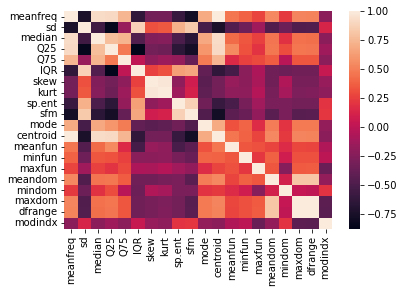

In [11]:
sns.heatmap(corr)
plt.show()

Here strong correlated columns pair are ("meanfreq" -> "median", "Q25", "centroid"),("Q25" -> "centroid")("maxdom" -> "dfrange") So that we can keep drop one of them each

In [13]:
X = X.drop("median",axis=1)
X = X.drop("Q25",axis=1)
X = X.drop("centroid",axis=1)
X = X.drop("dfrange",axis=1)

In [15]:
# split  dataset that have dropped some co-related columns
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 10, test_size = 0.20)

In [16]:
#train the model with modified data set 
ln_model = LogisticRegression(solver='lbfgs', max_iter=1000)
ln_model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [17]:
# predict using data set and obtain accuracy
predicted_data = ln_model.predict(test_x)
metrics.accuracy_score(predicted_data, test_y)

0.916403785488959